<a href="https://colab.research.google.com/github/Sungrebe/Bird_Guide_App/blob/main/bird_guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load files from Google Drive

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import shutil
import random

bird_dict = {
    '0457': 'Canada Goose',
    '0469': 'Wild Turkey',
    '0480': 'Great Blue Heron',
    '0490': 'Turkey Vulture',
    '0504': 'Killdeer',
    '0525': 'Rock Pigeon',
    '0549': 'Belted Kingfisher',
    '0957': 'American Crow',
    '0810': 'Barn Swallow',
    '0840': 'Ruby-crowned Kinglet',
    '0852': 'Northern Mockingbird',
    '0824': 'White-breasted Nuthatch',
    '0902': 'Song Sparrow',
}

# create the training and test folders for each species

if (not os.path.isdir('/content/training') and not os.path.isdir('/content/test')):
  os.mkdir('/content/training')
  os.mkdir('/content/test')

# populate the training and test folders for each species using an 80/20 split

parent_dir = '/content/drive/MyDrive/Bird-Guide-Project/'

for bird_img_dir in bird_dict:

  species_training_dir = os.path.join('/content/training/', bird_dict[bird_img_dir])
  species_test_dir = os.path.join('/content/test/', bird_dict[bird_img_dir])

  if (not os.path.isdir(species_training_dir) and not os.path.isdir(species_test_dir)):
    os.mkdir(species_training_dir)
    os.mkdir(species_test_dir)

  img_dir_path = os.path.join(parent_dir, 'nabirds/', bird_img_dir)
  img_list = os.listdir(img_dir_path)

  num_training_images = int(0.8 * len(img_list))
  num_test_images = int(0.2 * len(img_list))

  training_img_list = []
  test_img_list = []

  for i in range(num_training_images):
    rand_training_img = random.choice(img_list)
    training_img_list.append(rand_training_img)

  for i in range(num_test_images):
    rand_test_img = random.choice(img_list)
    test_img_list.append(rand_test_img)

  for training_img in training_img_list:
    shutil.copy2(
      os.path.join(img_dir_path + '/', training_img),
      os.path.join('/content/training/' + bird_dict[bird_img_dir] + '/', training_img),
    )

  for test_img in test_img_list:
    shutil.copy2(
      os.path.join(img_dir_path + '/', test_img),
      os.path.join('/content/test/' + bird_dict[bird_img_dir] + '/', test_img),
    )

Found 779 files belonging to 13 classes.


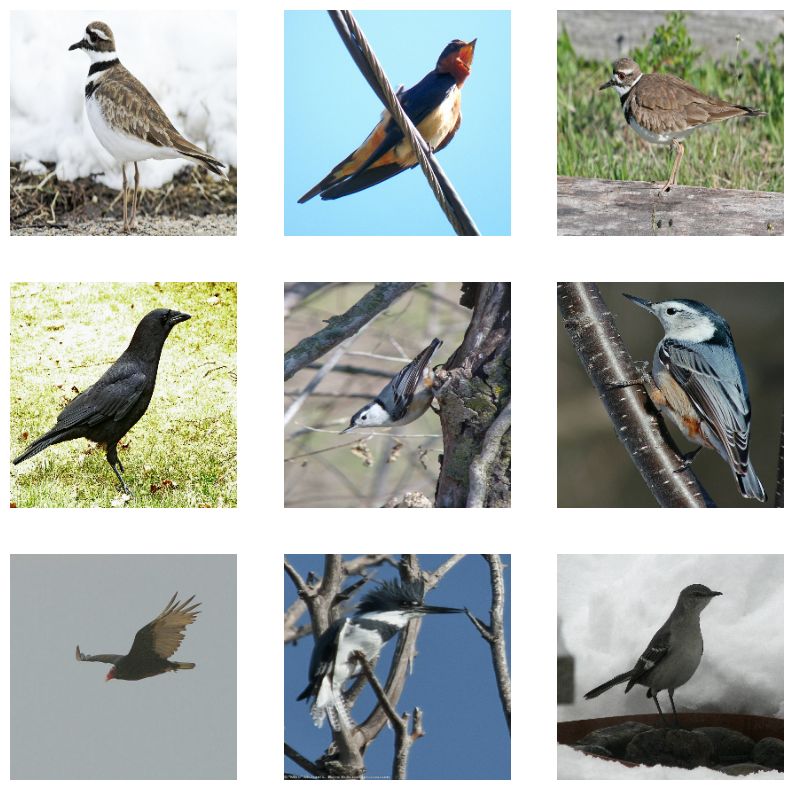

In [14]:
# visualize training images

from tensorflow import keras
import matplotlib.pyplot as plt

dataset = keras.utils.image_dataset_from_directory('/content/training/')

plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")